In [17]:

import SearchingOptimalEnsembles.metadatasets.tabrepo.metadataset as tabrepod
import SearchingOptimalEnsembles.metadatasets.quicktune.metadataset as qtd

import numpy as np
import seaborn as sns

from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
metadataset = tabrepod.TabRepoMetaDataset()
metadataset = qtd.QuicktuneMetaDataset()


In [19]:
metadataset.set_state(metadataset.dataset_names[3])
print(metadataset.get_num_classes())

20


In [20]:
X_obs = [i for i in range(len(metadataset.hp_candidates_ids))]
#X_obs = np.random.choice(X_obs, 120)

In [21]:
predictions = metadataset.get_predictions([X_obs])


In [22]:
predictions.shape


torch.Size([1, 253, 160, 20])

In [23]:
f1_scores = []
for i in range(predictions.shape[1]):

    y_pred = predictions[0][i].argmax(-1).numpy()
    y_true = metadataset.get_targets().numpy()
    f1_scores.append(f1_score(y_true, y_pred, average=None))


In [8]:

f1_scores = np.array(f1_scores)
f1_scores_mean_axis0 = f1_scores.mean(0)
f1_scores_mean_axis1 = f1_scores.mean(1)

worst_f1_scores= f1_scores[f1_scores_mean_axis1.argsort()].T[f1_scores_mean_axis0.argsort()]

Text(0, 0.5, 'Class')

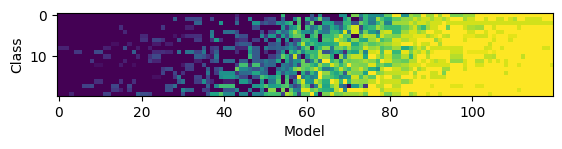

In [9]:
plt.imshow(worst_f1_scores)
plt.xlabel("Model")
plt.ylabel("Class")

<Axes: >

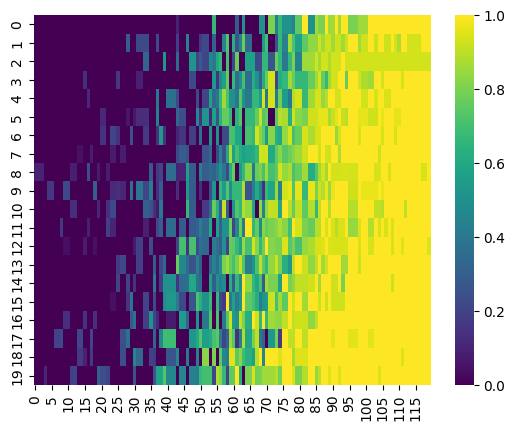

In [11]:
sns.heatmap(worst_f1_scores, cmap='viridis', cbar=True)